# PyTorch Workflow

Let's explore an exemplar of an end-to-end PyTorch workflow


In [67]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model", 
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [1]:
import torch
from torch import nn # nn contains all of PyTorch building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0+cu117'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images
* Videos (YouTube has lots of data...)
* Audio like songs and podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [69]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [70]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

Let's create a training and test set with our data.

In [71]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

Visualize, vidisdualize, visuzluaize!

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compares predictions.
  """
  
  plt.figure(figsize=(10, 7))
  
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot training data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  
  # Are there predicitons?
  if predictions is not None:
    # Plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
  # Show the legend
  plt.legend(prop={"size":14});

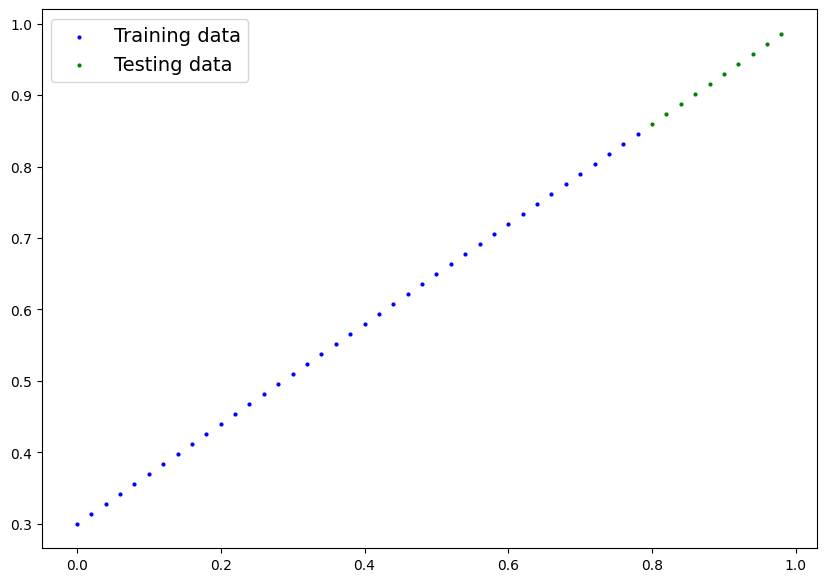

In [73]:
plot_predictions();

## 2. Build model

Our first PyTorch model!

In [157]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
  # Forward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs (a neural network)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - where the optimizers in PyTorch live, they help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside.

So we can check out our model parameters or what's inside our model using .parameters().

In [158]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [159]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method

In [160]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [161]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
  
# you can also do something similar wtih torch.no_grad(), however, torch.inference_mode() is preferred
#with torch.no_grad():
  #y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [162]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

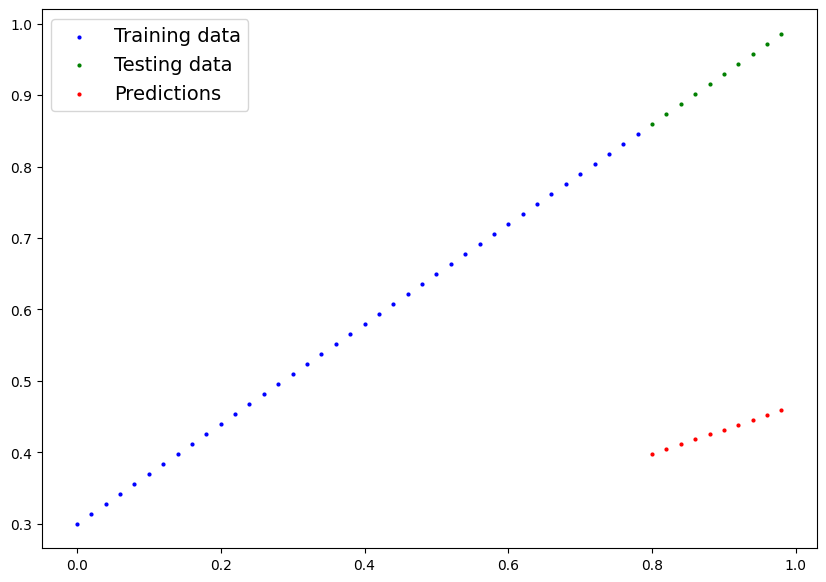

In [163]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters to some *known* parameters.

In other words, from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong a model's predictions are is to use a loss function.

* Note: Loss function may also be called cost function or critierion.

Things we need to train:

* **Loss function:** A function to measure how wrong a model's predictions are to the ideal outputs, lower is better. 
* **Optimizer:** Takes into account the loss of the model and adjusts the model's parameters (e.g. weight and bias in our case) to improve the loss function.

And specifically for PyTorch, we need:
* a training loop
* a testing loop

In [164]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [165]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [166]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # hyperparameter, a parameter we set

### Building a training loop and a testing loop in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through a model's `forward()` functions) to make predictions - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [167]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = [] 

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
  
  # 1. Forward pass
  y_pred = model_0(X_train)
  
  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  
  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()
  
  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default, how the optimizer changes will accumulate through the loop so we have to zero them above in step 3 for the next iteration

  
  ### Testing
  model_0.eval() # turns off different settings not needed for eval (dropout, norm)
  with torch.inference_mode(): # turns off gradient tracking
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    
    # 2. Calculate the loss
    test_loss = loss_fun(test_pred, y_test)
  
  # Print what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())
  

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [177]:
import numpy as np

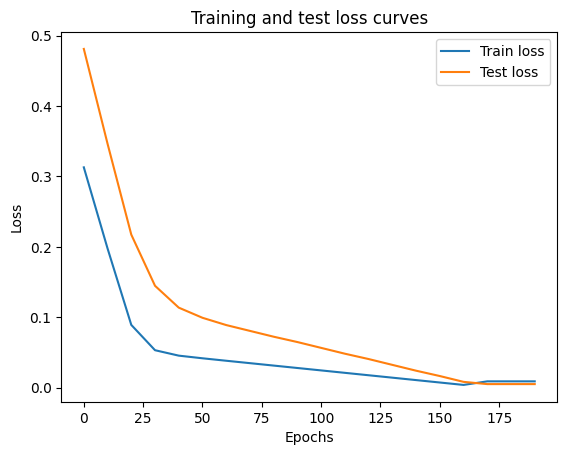

In [180]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [168]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [169]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

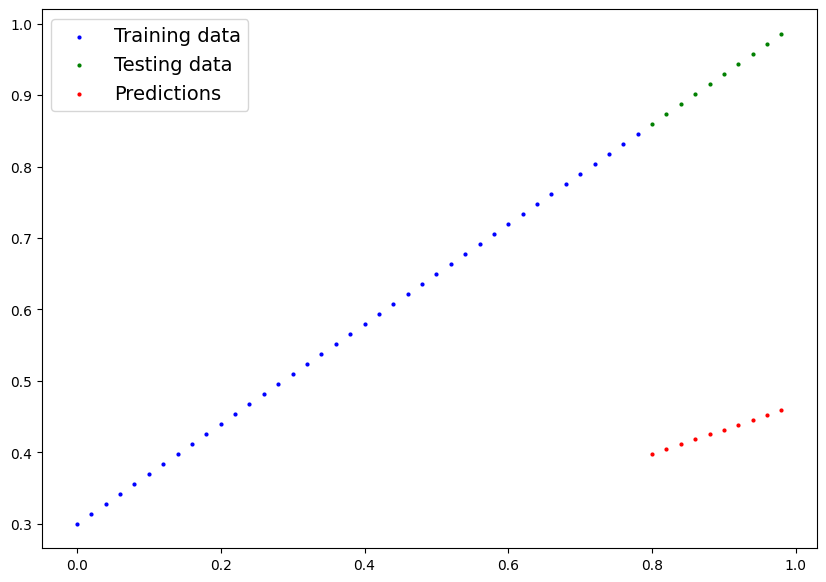

In [170]:
plot_predictions(predictions=y_preds)

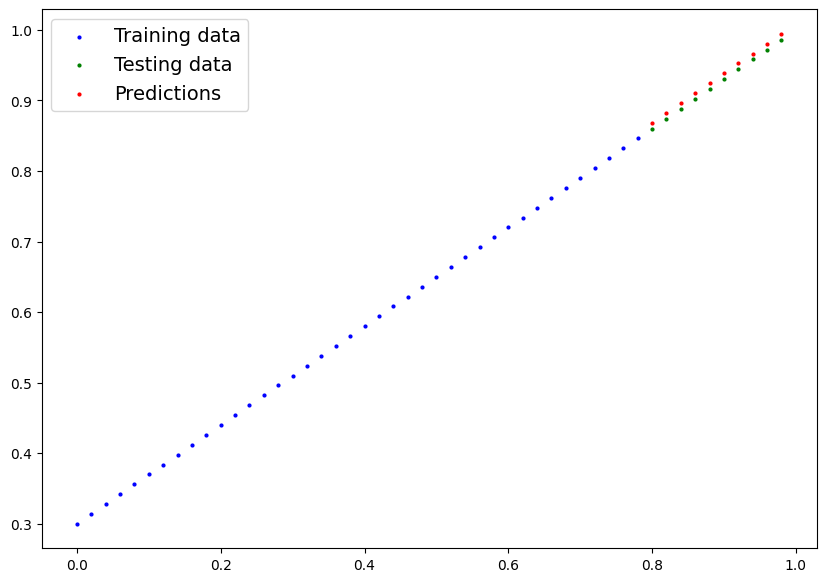

In [171]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save PyTorch objects in pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - This allows  you to load a model's saved state dictionary

In [184]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model.state_dict()
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), 
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [185]:
!ls -l models

total 4
-rw-r--r-- 1 anujg anujg 1207 Jun  1 10:46 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our models `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [186]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [195]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0, this will update the new instance with updated parameters
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [196]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [197]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
  
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [200]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
  
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [201]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

In [204]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.0+cu117'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it, else CPU.

In [205]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


#### 6.1 Data

In [207]:
# Create some data using linear regression formula of y = weight * features + bias
weight = 0.7
bias = 0.3

# Create range of values
start = 0 
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [209]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test),

(40, 10, 40, 10)

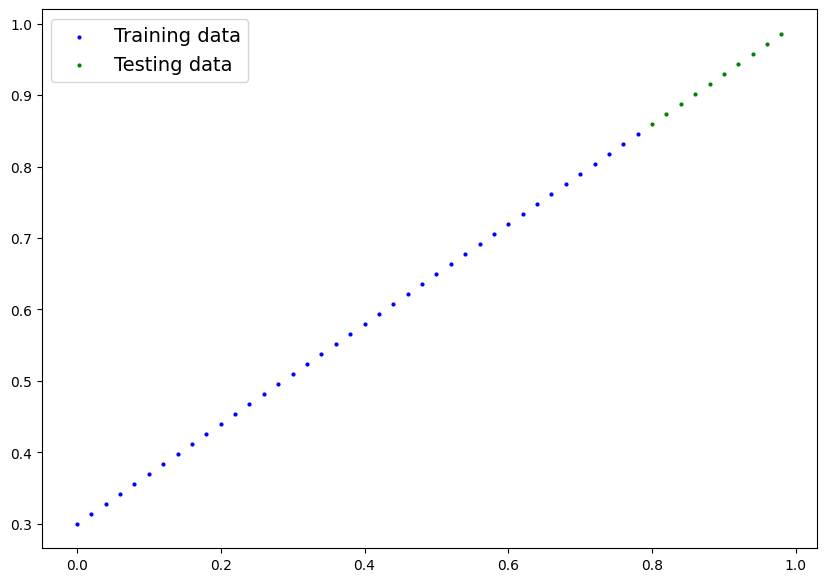

In [210]:
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch linear model

In [213]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called linear transform, probing layer, dense layer, fully connected
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
  
# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [215]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [217]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training, we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [222]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.01)

In [223]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on target device (device-agnostic code)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  
  # 1. Forward pass
  y_pred = model_1(X_train)
  
  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  
  # 4. Perform backpropagation
  loss.backward()
  
  # 5. Optimizer step
  optimizer.step()
  
  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    
    test_loss = loss_fn(test_pred, y_test)
    
  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.008447891101241112
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.008447891101241112
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.008447891101241112
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.008447891101241112
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.008447891101241112
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.008447891101241112
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.008447891101241112
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.008447891101241112
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.008447891101241112
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.008447891101241112
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.008447891101241112
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.008447891101241112
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.00

In [224]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

## 6.4 making and evalutating predictions

In [231]:
# Turn model into eval mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
  
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

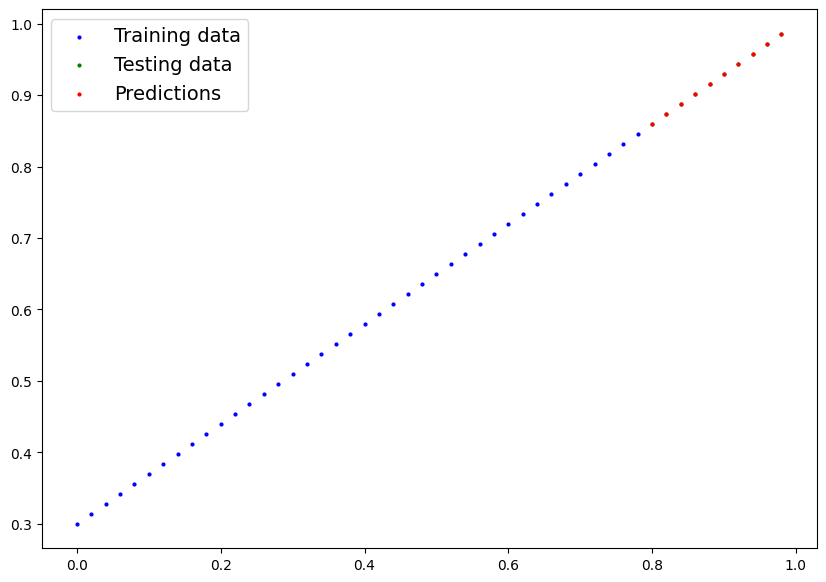

In [233]:
# Check out predictions visually
plot_predictions(predictions=y_preds.cpu())

## 6.5 Saving and loading a trained model

In [238]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [239]:
# Load a PyTorch model
loaded_model_1 = LinearRegressionModelV2()

# Load the model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [240]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [241]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
  
  
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises and extra-curriculum

### 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.
* Your output of the below cell should look something like:

`Number of X samples: 100`

`Number of y samples: 100`

`First 10 X & y samples:

`X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])`
        
`y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])`
        
Of course the numbers in X and y may be different but ideally they're created using the linear regression formula.

In [3]:
device = 'cuda' if torch.cuda.is_available else 'cpu'

# Create the data parameters
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature
X = torch.arange(0, 2, 0.02).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")
     

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y: tensor([[0.9000],
        [0.9060],
        [0.9120],
        [0.9180],
        [0.9240],
        [0.9300],
        [0.9360],
        [0.9420],
        [0.9480],
        [0.9540]])


In [4]:
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [5]:
# Split the data into training and testing
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

80 80
20 20


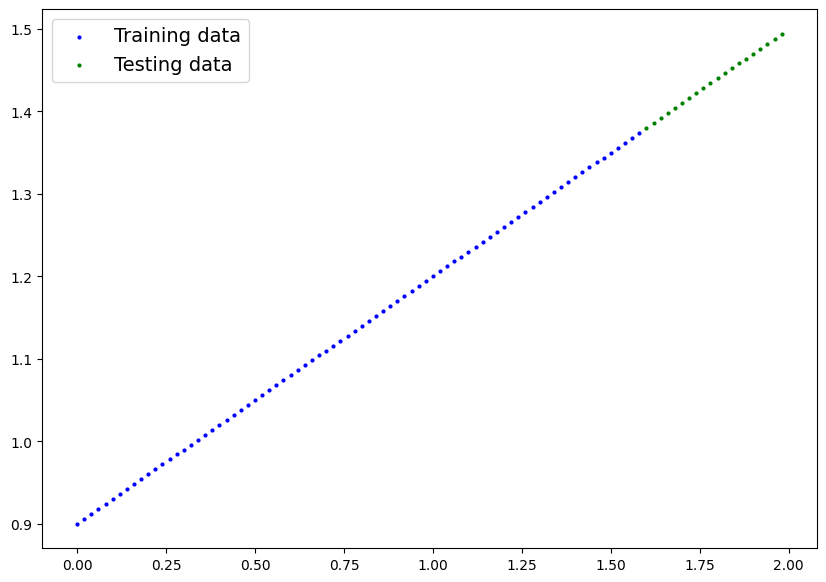

In [9]:
# Plot the training and testing data 
plot_predictions(X_train, y_train, X_test, y_test)

### 2. Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().
* Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [10]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, 
                                  out_features=1)
    
  def forward(self, x):
    return self.linear_layer(x)

In [11]:
# Instantiate the model and put it to the target device
model_2 = LinearRegressionModelV3()
print(model_2.state_dict())
model_2.to(device)
next(model_2.parameters()).device

OrderedDict([('linear_layer.weight', tensor([[0.6197]])), ('linear_layer.bias', tensor([-0.4771]))])


device(type='cuda', index=0)

### 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [12]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [26]:
# Training loop


# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_2.train()

  # 1. Forward pass
  y_pred = model_2(X_train) 

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context 
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test) 
      # 2. Calculate test loss
      test_loss = loss_fn(test_pred, y_test)
      # Print out what's happening
      if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.012 | Test loss: 0.004
Epoch: 20 | Train loss: 0.012 | Test loss: 0.004
Epoch: 40 | Train loss: 0.012 | Test loss: 0.004
Epoch: 60 | Train loss: 0.012 | Test loss: 0.004
Epoch: 80 | Train loss: 0.012 | Test loss: 0.004
Epoch: 100 | Train loss: 0.012 | Test loss: 0.004
Epoch: 120 | Train loss: 0.012 | Test loss: 0.004
Epoch: 140 | Train loss: 0.012 | Test loss: 0.004
Epoch: 160 | Train loss: 0.012 | Test loss: 0.004
Epoch: 180 | Train loss: 0.012 | Test loss: 0.004
Epoch: 200 | Train loss: 0.012 | Test loss: 0.004
Epoch: 220 | Train loss: 0.012 | Test loss: 0.004
Epoch: 240 | Train loss: 0.012 | Test loss: 0.004
Epoch: 260 | Train loss: 0.012 | Test loss: 0.004
Epoch: 280 | Train loss: 0.012 | Test loss: 0.004


In [27]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3086]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9051], device='cuda:0'))])

### 4. Make predictions with the trained model on the test data.
* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [28]:
# Make predictions with the model
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test)

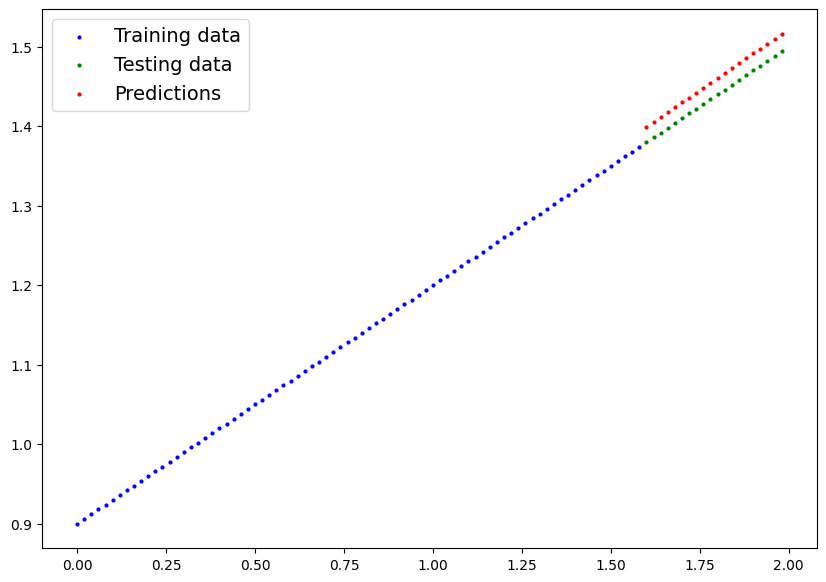

In [30]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions=y_preds.cpu())

### 5. Save your trained model's state_dict() to file.

* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [36]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(model_2.state_dict(), MODEL_SAVE_PATH)

In [37]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_2 = LinearRegressionModelV3()
loaded_model_2.state_dict()

loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [39]:
loaded_model_2.to(device)
loaded_model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3086]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9051], device='cuda:0'))])

In [40]:
# Make predictions with loaded model and compare them to the previous
loaded_model_2.eval()
with torch.inference_mode():
  y_preds_new = loaded_model_2(X_test)
  

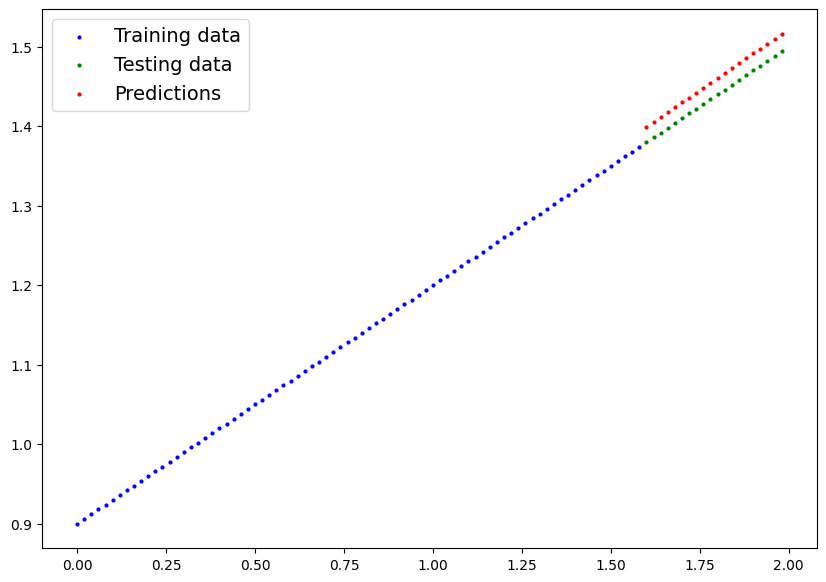

In [42]:
plot_predictions(predictions=y_preds_new.cpu())

In [43]:
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')